Perspective Tansformation

In [2]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

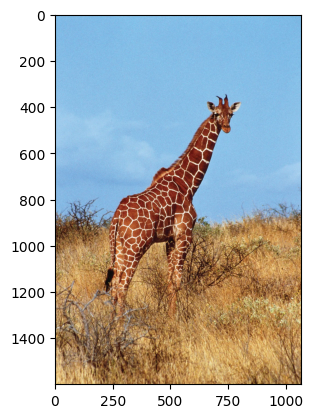

In [4]:
image  = cv2.imread("./images/giraffe-Kenya.png")
image_rgb = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

In [5]:
image_rgb.shape

(1600, 1067, 3)

In [8]:
rows , cols , _ = image_rgb.shape

imput_points = np.float32([[50  ,50],[cols-50 , 50], [50 , rows-50] ,[cols - 50 , rows- 50] ])
output_points =  np.float32([[10 ,100] ,[cols-100 , 100] , [100 , rows-100] ,[cols - 50 , rows- 100] ])

M = cv2.getPerspectiveTransform(imput_points , output_points)
print(M)

[[ 9.91099814e-01  6.29996360e-02 -4.26904112e+01]
 [ 2.93657811e-17  9.78376411e-01  5.12267929e+01]
 [ 1.70529633e-19  2.91226793e-05  1.00000000e+00]]


(np.float64(-0.5), np.float64(1066.5), np.float64(1599.5), np.float64(-0.5))

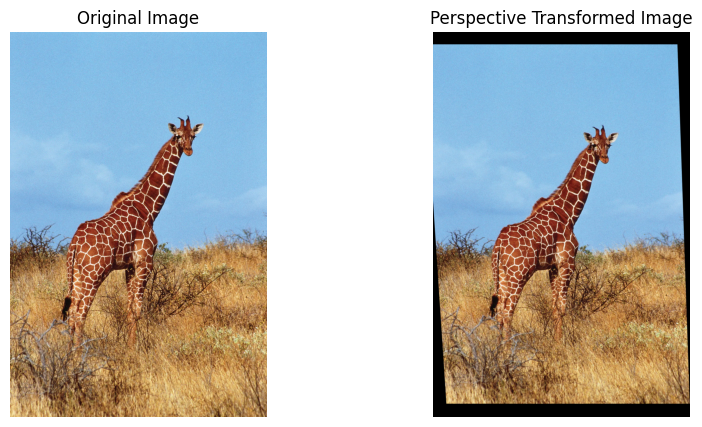

In [9]:
perspective_image = cv2.warpPerspective(image_rgb ,  M , (cols , rows))

plt.figure(figsize = (10 ,5) )

plt.subplot(1 , 2 ,1)
plt.title("Original Image")
plt.imshow(image_rgb)
plt.axis("off")

plt.subplot(1, 2 ,2)
plt.title("Perspective Transformed Image")
plt.imshow(perspective_image)
plt.axis("off")


Affine Transformation

(np.float64(-0.5), np.float64(1066.5), np.float64(1599.5), np.float64(-0.5))

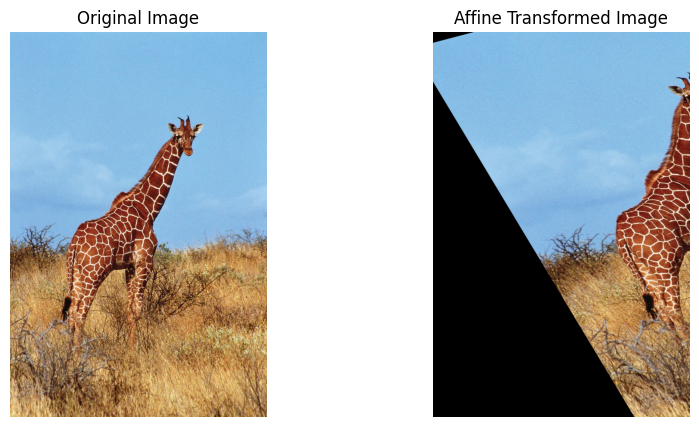

In [10]:
input_points  = np.float32([[50 ,50]  ,[200 ,50] ,[50 , 200]])
output_points = np.float32([[10 ,100] ,[200 ,50] ,[100 , 250]]) 
M = cv2.getAffineTransform(input_points , output_points)

affine_image = cv2.warpAffine(image_rgb , M , (cols , rows))

plt.figure(figsize = (10 ,5) )
plt.subplot(1 , 2 ,1)
plt.title("Original Image")
plt.imshow(image_rgb)
plt.axis("off")
plt.subplot(1, 2 ,2)
plt.title("Affine Transformed Image")
plt.imshow(affine_image)
plt.axis("off")

Rotation

(np.float64(-0.5), np.float64(1066.5), np.float64(1599.5), np.float64(-0.5))

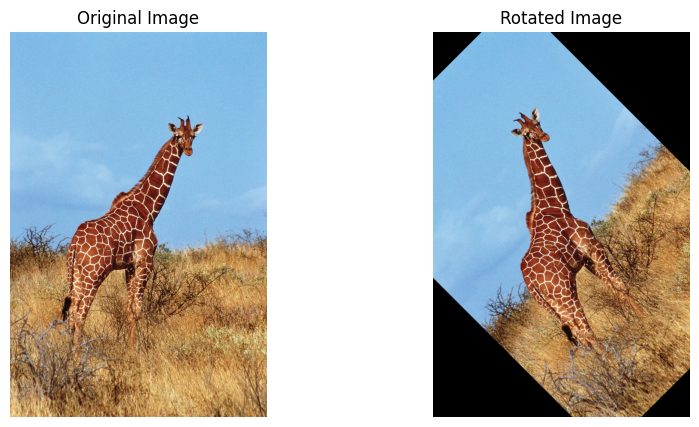

In [11]:
angle = 45
center =  (cols // 2,  rows // 2)
scale = 1.0

M =  cv2.getRotationMatrix2D(center , angle , scale)

rotated_image   = cv2.warpAffine(image_rgb  , M   , (cols , rows))

plt.figure(figsize = (10 ,5) )
plt.subplot(1 , 2 ,1)
plt.title("Original Image")
plt.imshow(image_rgb)
plt.axis("off")
plt.subplot(1, 2 ,2)
plt.title("Rotated Image")
plt.imshow(rotated_image)
plt.axis("off")


(np.float64(-0.5), np.float64(2133.5), np.float64(1599.5), np.float64(-0.5))

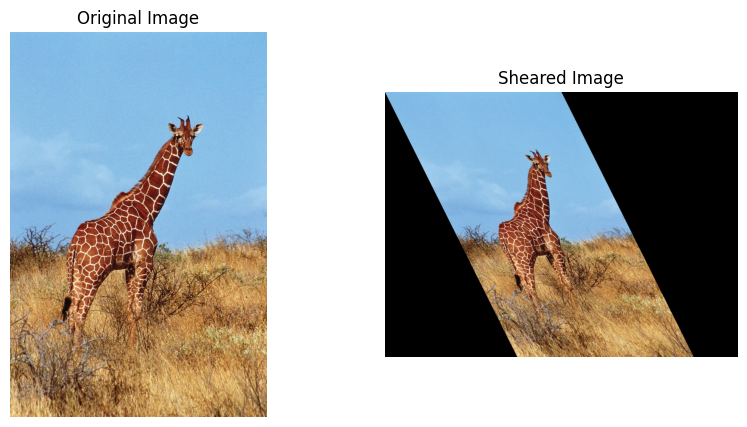

In [ ]:
    shear_x , shear_y = 0.5 , 0

    M =  np.float32([[1, shear_x, 0] , 
                [shear_y , 1 , 0]])
    sheared_image = cv2.warpAffine(image_rgb , M  , (cols*2 , rows))


plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(sheared_image)
plt.title("Sheared Image")
plt.axis("off")

Translation

(np.float64(-0.5), np.float64(1066.5), np.float64(1599.5), np.float64(-0.5))

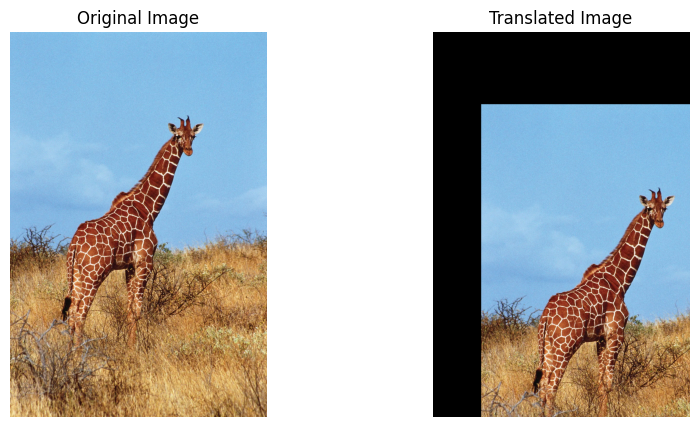

In [15]:
tx ,ty =200,  300
M  = np.float32([[1, 0, tx] , [0 , 1, ty]])

translated_image =  cv2.warpAffine(image_rgb  , M , (cols  , rows))

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(translated_image)
plt.title("Translated Image")
plt.axis("off") 
